In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [3]:
df = pd.read_csv('heart.csv', header = None)

In [4]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [8]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.9415

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [10]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
num_duplicates = duplicates.sum()
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [11]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x500 with 0 Axes>

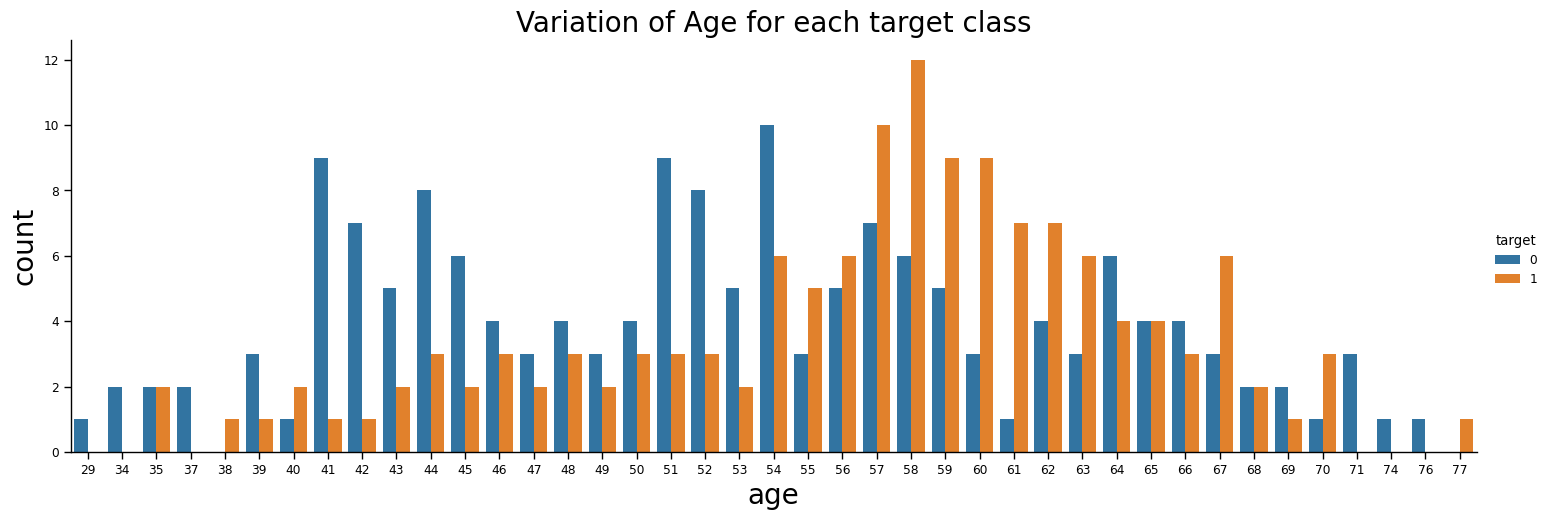

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing data

sns.set_context("paper", font_scale=1, rc={"font.size": 10, "axes.titlesize": 20, "axes.labelsize": 20})

plt.figure(figsize=(10, 5))  # Set the dimensions of the entire figure

# Adjust the width ratio of the plot within the figure
sns.catplot(kind='count', data=df, x='age', hue='target', order=df['age'].sort_values().unique(), aspect=3)
plt.title('Variation of Age for each target class')
plt.show()


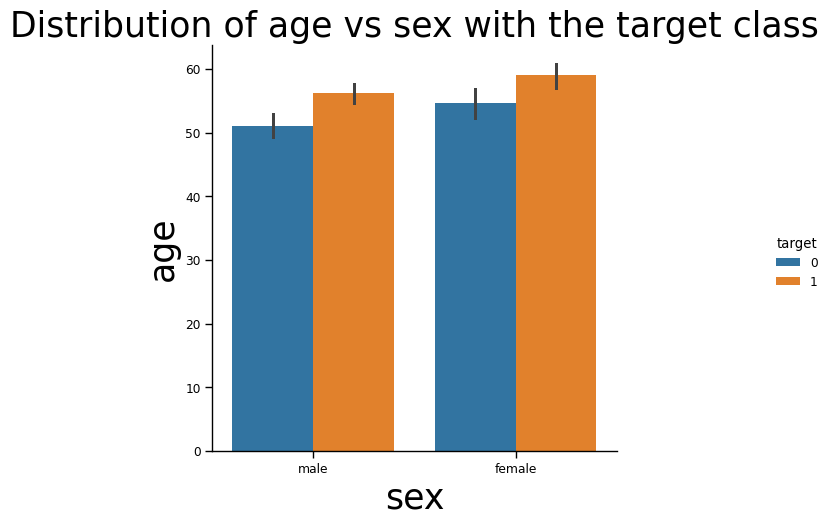

In [13]:
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

/var/folders/cb/1qsf60kx5c707x3rrf86sqgw0000gn/T/ipykernel_91576/2944843035.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")


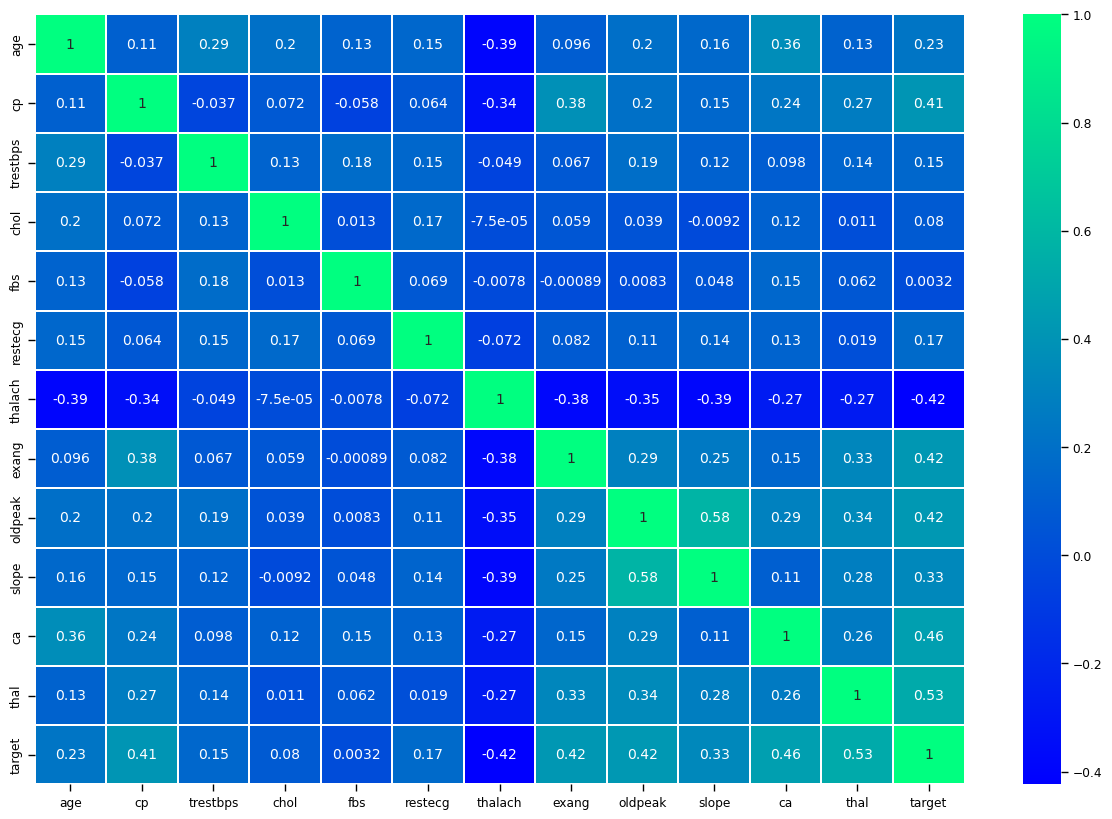

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

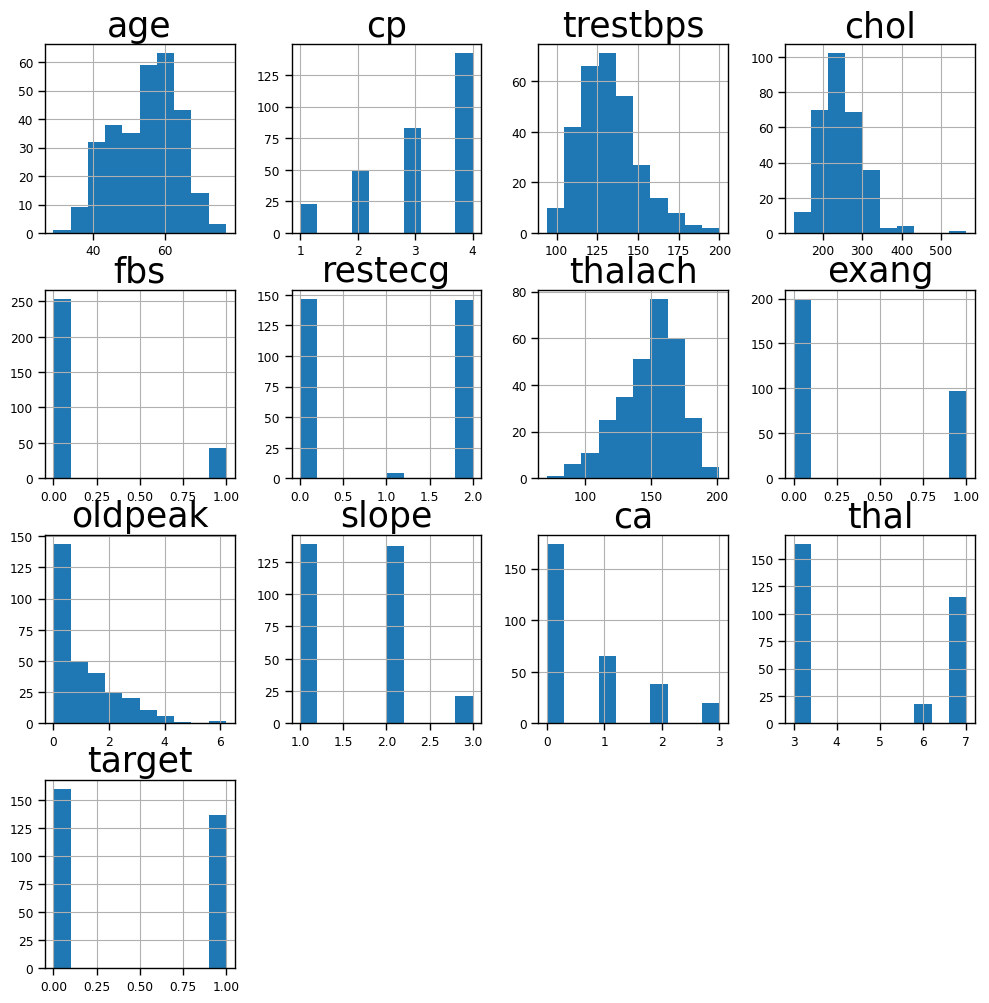

In [15]:
df.hist(figsize=(12,12))
plt.savefig('featuresplot')

In [16]:
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, columns=['sex'], drop_first=True)

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in X_test:", len(X_test))
print("Number of samples in y_test:", len(y_test))


Number of samples in X_train: 207
Number of samples in y_train: 207
Number of samples in X_test: 90
Number of samples in y_test: 90


Feature 0 (age): 0.0000
Feature 1 (cp): 0.6204
Feature 2 (trestbps): 0.0000
Feature 3 (chol): 0.0000
Feature 4 (fbs): 0.0000
Feature 5 (restecg): 0.0000
Feature 6 (thalach): 0.0000
Feature 7 (exang): 0.0000
Feature 8 (oldpeak): 0.1191
Feature 9 (slope): 0.0000
Feature 10 (ca): 0.2605
Feature 11 (thal): 0.0000
Feature 12 (sex_male): 0.0000


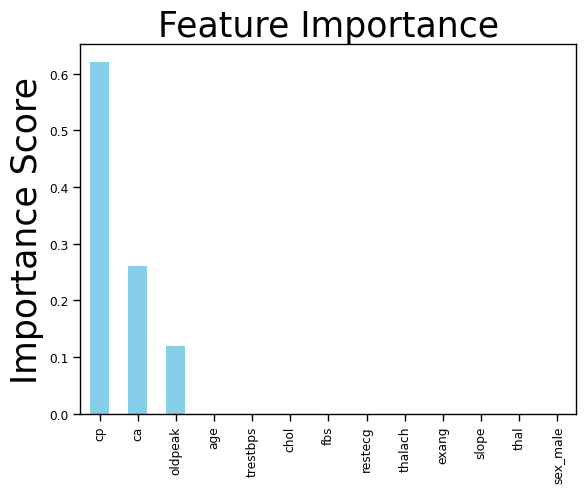

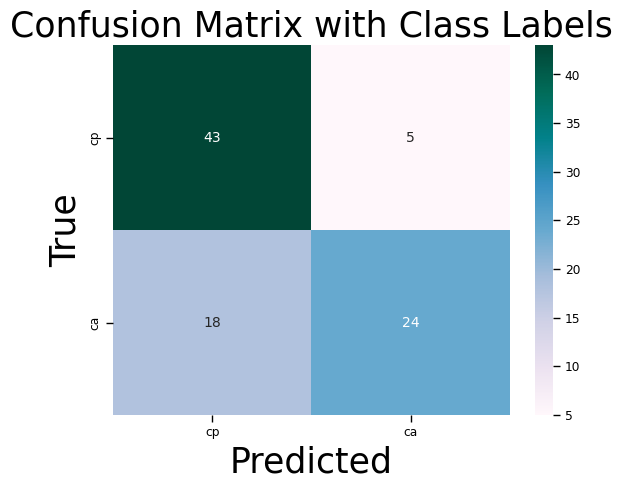

Decision Tree Accuracy: 0.7444
Decision Tree Precision: 0.7663
Decision Tree Recall: 0.7336
Decision Tree F1 Score: 0.7325
Decision Tree Runtime: 0.21957182884216309 seconds


In [36]:
#Decision Tree

import time

start_time = time.time()

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split=2, max_depth=2,
min_samples_leaf=2, random_state=42)
dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

feature_importances = dt.feature_importances_
for i, col_name in enumerate(X.columns):
    print(f"Feature {i} ({col_name}): {feature_importances[i]:.4f}")
    
import pandas as pd
import matplotlib.pyplot as plt
importances = dt.feature_importances_
feature_importance_series = pd.Series(importances, index=X.columns)
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

sorted_feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names=['cp', 'ca']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBuGn', xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Class Labels')
plt.show()


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(f"Decision Tree Precision: {precision:.4f}")
print(f"Decision Tree Recall: {recall:.4f}")
print(f"Decision Tree F1 Score: {f1:.4f}")

end_time = time.time()
runtime = end_time - start_time
print(f"Decision Tree Runtime: {runtime} seconds")



In [37]:
# Random Forest Model
import time

start_time = time.time()



from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")

end_time = time.time()
runtime = end_time - start_time
print(f"Random Forest Runtime: {runtime} seconds")


Random Forest Accuracy: 0.8222
Random Forest Precision: 0.8249
Random Forest Recall: 0.8185
Random Forest F1 Score: 0.8200
Random Forest Runtime: 0.09560966491699219 seconds


In [41]:
# Gaussian Naive Bayes Model

import time

start_time = time.time()

from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Naive Bayes Precision: {precision_nb:.4f}")
print(f"Naive Bayes Recall: {recall_nb:.4f}")
print(f"Naive Bayes F1 Score: {f1_nb:.4f}")


end_time = time.time()
runtime = end_time - start_time
print(f"Naive Bayes Runtime: {runtime} seconds")



Naive Bayes Accuracy: 0.8778
Naive Bayes Precision: 0.8778
Naive Bayes Recall: 0.8765
Naive Bayes F1 Score: 0.8770
Naive Bayes Runtime: 0.016418933868408203 seconds


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
#Logistic Regression
import time

start_time = time.time()



from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


lr = LogisticRegression(max_iter=100)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Logistic Regression F1 Score: {f1_lr:.4f}")

end_time = time.time()
runtime = end_time - start_time
print(f"Logistic Regression Runtime: {runtime} seconds")


Logistic Regression Accuracy: 0.8444
Logistic Regression Precision: 0.8477
Logistic Regression Recall: 0.8408
Logistic Regression F1 Score: 0.8425
Logistic Regression Runtime: 0.0173187255859375 seconds


In [39]:
#SVM
import time

start_time = time.time()



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1 Score: {f1_svm:.4f}")

end_time = time.time()
runtime = end_time - start_time
print(f"SVM Runtime: {runtime} seconds")


SVM Accuracy: 0.8667
SVM Precision: 0.8704
SVM Recall: 0.8631
SVM F1 Score: 0.8650
SVM Runtime: 0.014382123947143555 seconds


In [40]:
#KNN
import time

start_time = time.time()


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN Precision: {precision_knn:.4f}")
print(f"KNN Recall: {recall_knn:.4f}")
print(f"KNN F1 Score: {f1_knn:.4f}")

end_time = time.time()
runtime = end_time - start_time
print(f"KNN Runtime: {runtime} seconds")



KNN Accuracy: 0.8778
KNN Precision: 0.8801
KNN Recall: 0.8750
KNN F1 Score: 0.8765
KNN Runtime: 0.017373323440551758 seconds
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


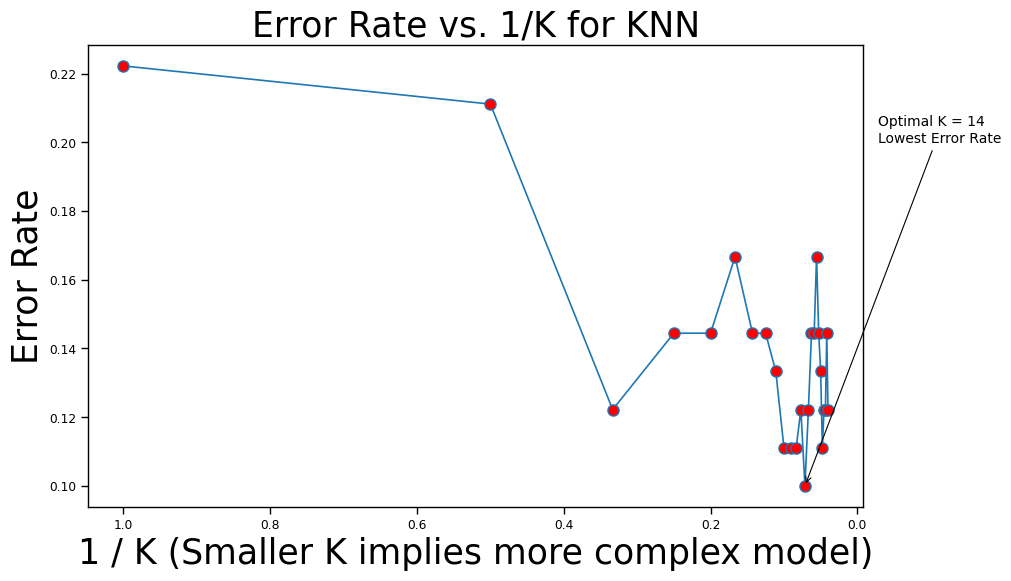

In [24]:
error_rates = []
k_values = range(1, 26)  # k from 1 to 25

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rates.append(1 - accuracy_score(y_test, y_pred))
    
# Plotting error rates
plt.figure(figsize=(10, 6))
plt.plot([1/k for k in k_values], error_rates, marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. 1/K for KNN')
plt.xlabel('1 / K (Smaller K implies more complex model)')
plt.ylabel('Error Rate')
plt.gca().invert_xaxis()

#Annotating the plot with optimal k value
optimal_k = k_values[error_rates.index(min(error_rates))]
plt.annotate(f'Optimal K = {optimal_k}\nLowest Error Rate', 
             xy=(1/optimal_k, min(error_rates)),
             xytext=(1/optimal_k - 0.1, min(error_rates) + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {}
nb = GaussianNB()

grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)
print("Best parameters found: ", grid_search_nb.best_params_)
print("Best accuracy found: ", grid_search_nb.best_score_)
best_nb = grid_search_nb.best_estimator_

accuracy_nb = best_nb.score(X_test, y_test)
print(f"Test set accuracy of the best Naive Bayes model: {accuracy_nb}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {}
Best accuracy found:  0.8164251207729469
Test set accuracy of the best Naive Bayes model: 0.8777777777777778


In [26]:
from joblib import dump
dump(rf, 'rf.pkl')

['rf.pkl']

In [27]:
from flask import Flask, request, jsonify
import joblib
app = Flask(__name__)
model = joblib.load('rf.pkl')

In [28]:
try:
    # Load the trained model from the file
    model = joblib.load('rf.pkl')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")
    model = None

@app.route('/predict', methods=['POST'])
def predict():
    try:
        if model is None:
            raise ValueError("Model is not defined. Make sure it is loaded successfully.")
        
        data = request.json
        prediction = knn.predict([data['features']])
        return jsonify({'prediction': int(prediction[0])})
    except Exception as e:
        return jsonify({'error': str(e)})

Model loaded successfully.


In [29]:
def run_app():
    app.run(port=5000, debug=False, use_reloader=False)
if __name__ == 'knn':
    run_app()

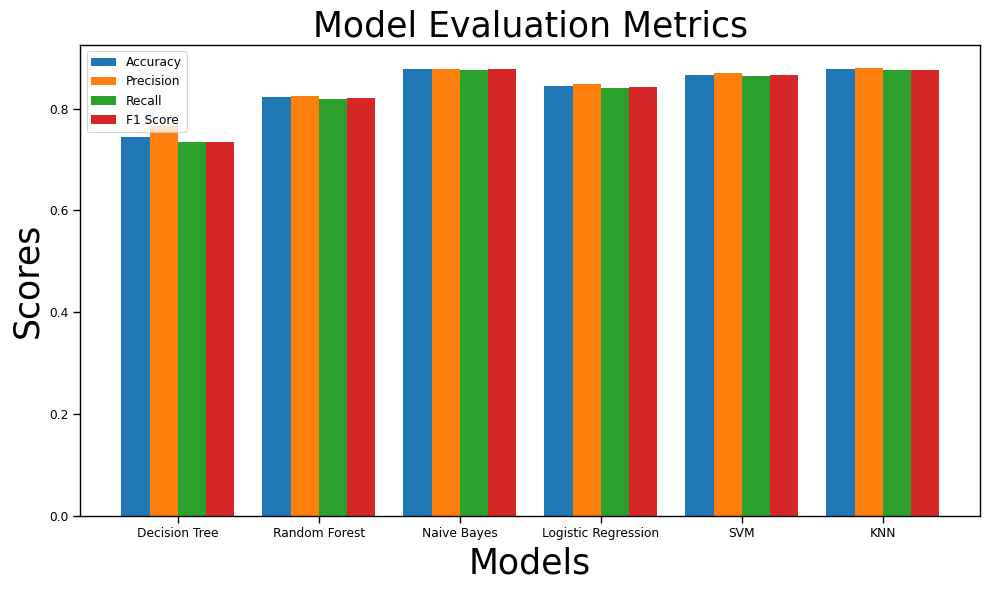

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'SVM', 'KNN']
accuracy = [0.7444, 0.8222, 0.8778, 0.8444, 0.8667, 0.8778] 
precision = [0.7663, 0.8249, 0.8778, 0.8477, 0.8704, 0.8801]  
recall = [0.7336, 0.8185, 0.8765, 0.8408, 0.8631, 0.8750]  
f1_score = [0.7336, 0.8200, 0.8770, 0.8425, 0.8650, 0.8765] 

# Set up width and bar positions
bar_width = 0.2
index = np.arange(len(models))

# Create grouped bar plots
plt.figure(figsize=(10, 6))
plt.bar(index - bar_width * 1.5, accuracy, width=bar_width, label='Accuracy')
plt.bar(index - bar_width * 0.5, precision, width=bar_width, label='Precision')
plt.bar(index + bar_width * 0.5, recall, width=bar_width, label='Recall')
plt.bar(index + bar_width * 1.5, f1_score, width=bar_width, label='F1 Score')

# Customize plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')
plt.xticks(index, models)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
